<a href="https://colab.research.google.com/github/ADv0rnik/Data-analysis-for-JER/blob/main/Monthly_index_calc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating of monthly index for airborne activity of surface air

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import seaborn as sns
import matplotlib.ticker as ticker

In [ ]:
#Adding dictionary for manipulating month numbers
m_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Data for JER/Weekly_index03-20.csv'
df = pd.read_csv(path, parse_dates=['Date'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    932 non-null    datetime64[ns]
 1   Conc    929 non-null    float64       
 2   w_i     929 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 22.0 KB


In [ ]:
df1 = df.reset_index().drop('index', axis = 1)

In [ ]:
df1['Week'] = df1.Date.dt.isocalendar().week
df1['Month'] = df1.Date.dt.month
df1['Year'] = df1.Date.dt.year
df_mod = df1.drop('Conc', axis =1)
df_mod

,Date,w_i,Week,Month,Year
0,2003-01-05,1.837894,1,1,2003
1,2003-01-12,2.415117,2,1,2003
2,2003-01-19,0.661401,3,1,2003
3,2003-01-26,1.132399,4,1,2003
4,2003-02-02,0.479349,5,2,2003
...,...,...,...,...,...
927,2020-11-29,0.849516,48,11,2020
928,2020-12-06,2.487869,49,12,2020
929,2020-12-13,2.510624,50,12,2020
930,2020-12-20,1.145330,51,12,2020


In [ ]:
def mi(my_df, year):
  df_x = my_df[my_df['Year'] == year]
  df_x_m = df_x.groupby(by = 'Month').mean()
  df_x_m.reset_index(inplace = True)
  df_x_m = df_x_m.drop(['Week'], axis = 1)
  #df_x_m.columns = ['M_i', 'Year']
  return df_x_m

mi03 = mi(df_mod, 2003)
mi1 = mi03.append(mi(df_mod, 2004))
mi2 = mi1.append(mi(df_mod, 2005))
mi3 = mi2.append(mi(df_mod, 2006))
mi4 = mi3.append(mi(df_mod, 2007))
mi5 = mi4.append(mi(df_mod, 2008))
mi6 = mi5.append(mi(df_mod, 2009))
mi7 = mi6.append(mi(df_mod, 2010))
mi8 = mi7.append(mi(df_mod, 2011))
mi9 = mi8.append(mi(df_mod, 2012))
mi10 = mi9.append(mi(df_mod, 2013))
mi11= mi10.append(mi(df_mod, 2014))
mi12 = mi11.append(mi(df_mod, 2015))
mi13 = mi12.append(mi(df_mod, 2016))
mi14 = mi13.append(mi(df_mod, 2017))
mi15 = mi14.append(mi(df_mod, 2018))
mi16 = mi15.append(mi(df_mod, 2019))
mi17 = mi16.append(mi(df_mod, 2020))
mi17['Mon'] = mi17['Month'].replace(m_dict)
mi_fin=mi17.drop(['Month'], axis = 1)
mi_fin

,w_i,Year,Mon
0,1.511703,2003,Jan
1,0.858903,2003,Feb
2,1.121710,2003,Mar
3,1.029055,2003,Apr
4,1.219667,2003,May
...,...,...,...
7,0.885924,2020,Aug
8,0.984149,2020,Sep
9,1.213595,2020,Oct
10,1.139262,2020,Nov


In [ ]:
#adding seasons in front of Month
mi_fin['season'] = np.where(mi_fin.Mon.isin(['Apr','May','Jun','Jul','Aug','Sep']), 'sum', 'win')
mi_fin.columns = ('m_i','Year', 'Mon', 'season')
mi_fin.head(30)

,m_i,Year,Mon,season
0,1.511703,2003,Jan,win
1,0.858903,2003,Feb,win
2,1.121710,2003,Mar,win
3,1.029055,2003,Apr,sum
4,1.219667,2003,May,sum
5,0.994440,2003,Jun,sum
6,0.977070,2003,Jul,sum
7,0.765622,2003,Aug,sum
8,0.782491,2003,Sep,sum
9,0.731550,2003,Oct,win


In [ ]:
mi_sum = mi_fin.loc[mi_fin['Mon'].isin(['Apr','May','Jun','Jul','Aug','Sep'])]
mi_sum

,m_i,Year,Mon,season
3,1.029055,2003,Apr,sum
4,1.219667,2003,May,sum
5,0.994440,2003,Jun,sum
6,0.977070,2003,Jul,sum
7,0.765622,2003,Aug,sum
...,...,...,...,...
4,1.142296,2020,May,sum
5,0.764185,2020,Jun,sum
6,0.684543,2020,Jul,sum
7,0.885924,2020,Aug,sum


In [ ]:
mi_win = mi_fin.loc[mi_fin['Mon'].isin(['Jan','Feb','Mar','Oct','Nov','Dec'])]
mi_win

,m_i,Year,Mon,season
0,1.511703,2003,Jan,win
1,0.858903,2003,Feb,win
2,1.121710,2003,Mar,win
9,0.731550,2003,Oct,win
10,1.034191,2003,Nov,win
...,...,...,...,...
1,0.769874,2020,Feb,win
2,0.796421,2020,Mar,win
9,1.213595,2020,Oct,win
10,1.139262,2020,Nov,win


# *Building plots for overall data*

In [ ]:
mi_fin = mi_fin.reset_index(drop=True)
mi_win = mi_win.reset_index(drop=True)
mi_sum = mi_sum.reset_index(drop=True)

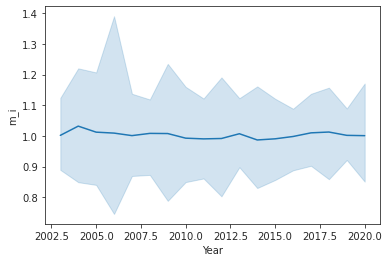

In [ ]:
#Чтобы устанавливать параметры графика, нужно дать "разрешение" через установку стиля
sns.set_style("ticks", {"xtick.major.size": 10, "ytick.major.size": 10})
sns.lineplot(data = mi_fin, x = 'Year', y = 'm_i')

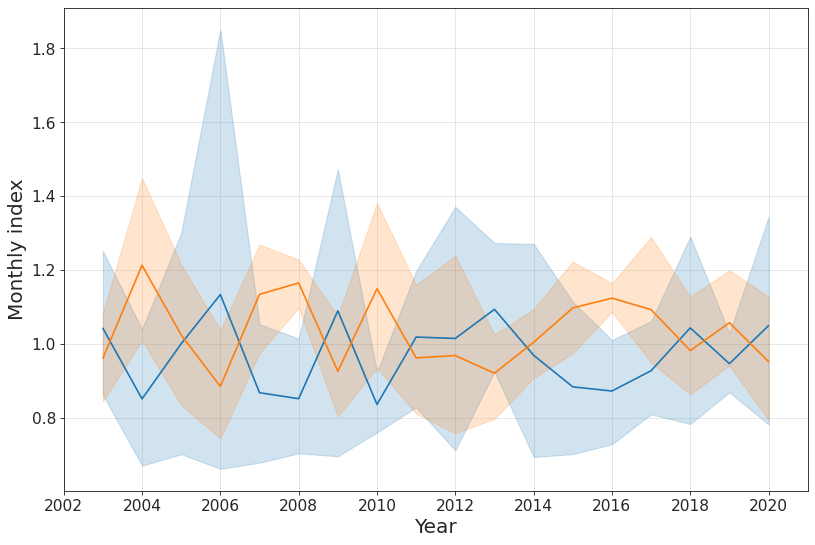

In [ ]:
f, ax = plt.subplots(figsize = (12, 8), dpi = 80)
sns.lineplot(data = mi_win,
             ax = ax,
             x = mi_win['Year'],
             y = mi_win['m_i'],
             markers = True)             
sns.lineplot(data = mi_sum,
             ax = ax,
             x = mi_sum['Year'],
             y = mi_sum['m_i'],
             markers = True)
ax.set(xlim = (2002, 2021))
ax.set_ylabel('Monthly index', fontsize = 18)
ax.set_xlabel('Year', fontsize = 18)
plt.xticks(np.arange(2002, 2022, 2),fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(alpha = 0.5)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data for JER/fig1.png')

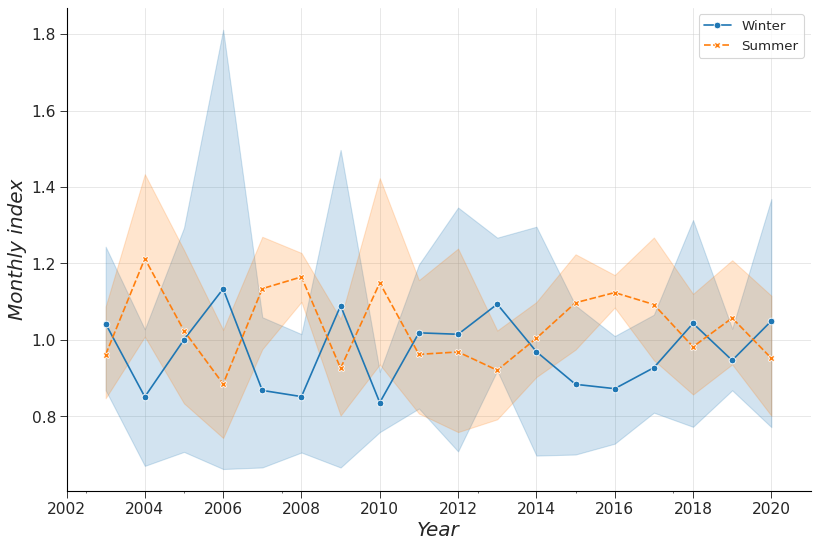

In [ ]:
f, ax = plt.subplots(figsize = (12, 8), dpi = 80)
sns.lineplot(data = mi_fin,            
             x = 'Year',
             y = 'm_i',
             hue = 'season',
             style = 'season',
             markers = True)
ax.set(xlim = (2002, 2021))
ax.set_ylabel('Monthly index', fontsize = 18, fontstyle='oblique', fontweight = 'medium')
ax.set_xlabel('Year', fontsize = 18, fontstyle='oblique', fontweight = 'medium')
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_minor_locator(ticker.AutoLocator())
#ax.minorticks_on()
#ax.tick_params(direction='out', labelsize = 12, length = 6)
plt.tick_params(axis = 'both', direction='out', length = 6)
plt.xticks(np.arange(2002, 2022, 2), fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(labels=["Winter","Summer"], fontsize = 'large', loc = 1)
plt.grid(alpha = 0.5)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data for JER/fig2.png')    

# *Two graphs in a single image*

In [ ]:
def mi_calc(my_df, year):
  df_x = my_df[my_df['Year'] == year]
  df_x_m = df_x.groupby(by = 'Month').mean()
  df_x_m.reset_index(inplace = True)
  df_x_m = df_x_m.drop(['Week', 'Year'], axis = 1)
  df_x_m.columns = ['Month', str(year)]
  return df_x_m

monthly_ind = mi_calc(df_mod, 2003)
#monthly_ind = df03_m.merge(df04, on = 'Month')
i = 2004
while i < 2021:
  monthly_ind = monthly_ind.merge(mi_calc(df_mod, i), on = 'Month')
  i += 1
monthly_ind.set_index('Month')

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Month,,,,,,,,,,,,,,,,,,
1,1.511703,1.206579,0.623029,1.185612,0.504684,0.977553,1.538770,0.740858,0.772284,1.178590,0.844101,0.544557,0.735422,0.966598,0.829955,0.960212,1.070510,0.661788
2,0.858903,0.899643,0.980893,2.786187,0.656399,0.630303,1.685138,1.000158,0.868571,1.701646,1.198170,0.583828,0.745120,0.569976,1.069977,1.531004,0.837955,0.769874
3,1.121710,0.751466,0.661115,0.988800,0.949508,0.639641,1.602663,0.711224,0.702302,0.982158,0.876958,1.090162,1.068059,0.865082,1.194687,1.181890,0.820514,0.796421
4,1.029055,1.103385,1.419241,0.976944,1.151794,1.219753,1.254944,1.032262,1.390376,1.597035,1.053710,0.901923,0.964938,1.104539,0.984668,0.863005,1.391537,1.250887
5,1.219667,1.071104,0.892505,1.083649,1.167275,1.251852,0.948972,1.051031,0.861623,1.146613,0.946073,1.119223,1.316325,1.138602,1.218183,1.149883,1.057871,1.142296
6,0.994440,0.905596,0.797650,0.704253,1.384011,1.034164,0.898571,1.037201,0.764343,0.797147,0.985728,0.799033,1.107174,1.091048,1.004911,0.911608,1.093513,0.764185
7,0.977070,1.018536,0.698482,1.130283,0.790156,1.059259,0.789113,1.328605,0.817946,0.785727,0.849766,0.998792,0.866343,1.057659,0.967317,0.801362,0.870184,0.684543
8,0.765622,1.510553,1.218032,0.751678,1.164179,1.218586,0.706638,1.715169,1.109290,0.794863,1.053710,1.057698,1.274947,1.227640,1.501944,0.902125,0.887247,0.885924
9,0.782491,1.666985,1.118326,0.661571,1.146840,1.205163,0.957118,0.730980,0.828865,0.688881,0.634492,1.149330,1.053836,1.123088,0.878393,1.264160,1.042705,0.984149


In [ ]:
monthly_ind['Mean'] = monthly_ind.iloc[:, 1:9].mean(axis=1)
monthly_ind.to_csv('/content/drive/MyDrive/Colab Notebooks/Data for JER/Mon_index2003-2010.csv')
monthly_ind

,Month,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Mean
0,1,1.511703,1.206579,0.623029,1.185612,0.504684,0.977553,1.538770,0.740858,0.772284,1.178590,0.844101,0.544557,0.735422,0.966598,0.829955,0.960212,1.070510,0.661788,1.036099
1,2,0.858903,0.899643,0.980893,2.786187,0.656399,0.630303,1.685138,1.000158,0.868571,1.701646,1.198170,0.583828,0.745120,0.569976,1.069977,1.531004,0.837955,0.769874,1.187203
2,3,1.121710,0.751466,0.661115,0.988800,0.949508,0.639641,1.602663,0.711224,0.702302,0.982158,0.876958,1.090162,1.068059,0.865082,1.194687,1.181890,0.820514,0.796421,0.928266
3,4,1.029055,1.103385,1.419241,0.976944,1.151794,1.219753,1.254944,1.032262,1.390376,1.597035,1.053710,0.901923,0.964938,1.104539,0.984668,0.863005,1.391537,1.250887,1.148422
4,5,1.219667,1.071104,0.892505,1.083649,1.167275,1.251852,0.948972,1.051031,0.861623,1.146613,0.946073,1.119223,1.316325,1.138602,1.218183,1.149883,1.057871,1.142296,1.085757
5,6,0.994440,0.905596,0.797650,0.704253,1.384011,1.034164,0.898571,1.037201,0.764343,0.797147,0.985728,0.799033,1.107174,1.091048,1.004911,0.911608,1.093513,0.764185,0.969486
6,7,0.977070,1.018536,0.698482,1.130283,0.790156,1.059259,0.789113,1.328605,0.817946,0.785727,0.849766,0.998792,0.866343,1.057659,0.967317,0.801362,0.870184,0.684543,0.973938
7,8,0.765622,1.510553,1.218032,0.751678,1.164179,1.218586,0.706638,1.715169,1.109290,0.794863,1.053710,1.057698,1.274947,1.227640,1.501944,0.902125,0.887247,0.885924,1.131307
8,9,0.782491,1.666985,1.118326,0.661571,1.146840,1.205163,0.957118,0.730980,0.828865,0.688881,0.634492,1.149330,1.053836,1.123088,0.878393,1.264160,1.042705,0.984149,1.033684
9,10,0.731550,0.989254,1.560806,0.753100,1.281836,0.992144,0.554925,0.847542,1.308317,0.520772,1.011221,1.030208,1.357702,0.930308,0.918156,0.892641,1.076830,1.213595,0.963894


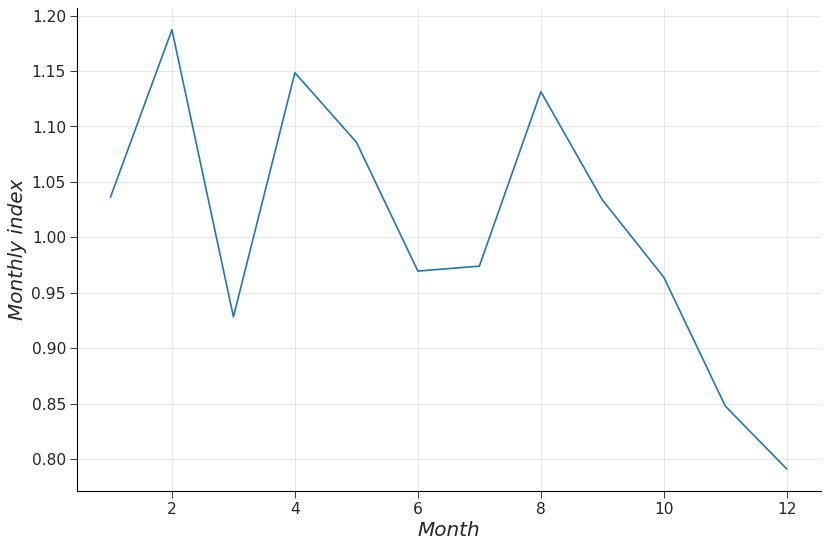

In [ ]:
f, ax = plt.subplots(figsize = (12, 8), dpi = 80)
sns.lineplot(data=monthly_ind, x = 'Month', y = 'Mean')
ax.set_ylabel('Monthly index', fontsize = 18,fontstyle='oblique', fontweight = 'medium')
ax.set_xlabel('Month', fontsize = 18, fontstyle='oblique', fontweight = 'medium')
ax.tick_params(axis = 'both', labelsize = 12, length = 6)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(alpha = 0.5)

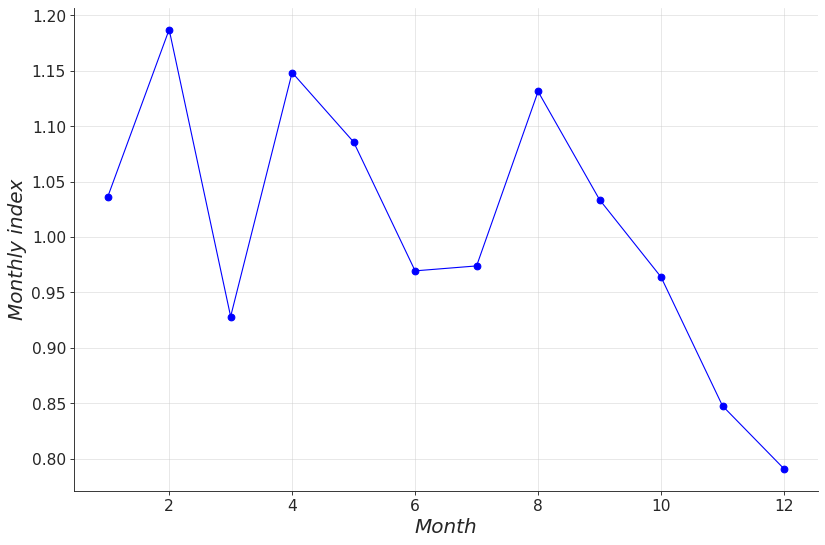

In [ ]:
x = monthly_ind['Month']
y = monthly_ind['Mean']
fig, ax = plt.subplots(1, figsize = (12,8), dpi = 80)
#plt.figure(1, figsize = (12,8), dpi = 80)
plt.plot(x, y, 
         color='blue',
         marker='o',
         linestyle='solid',
         linewidth=1,
         markersize = 6)
plt.xlabel('Month', fontsize = 18, fontstyle='oblique', fontweight = 'medium')
plt.ylabel('Monthly index', fontsize = 18, fontstyle='oblique', fontweight = 'medium')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(alpha = 0.5)

In [ ]:
#использовать цикл для перебора столбцов
#использовать метод loc[]
#длина фрейма?
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
monthly_ind_mod = monthly_ind.T
monthly_ind_mod.loc['Month'] = monthly_ind_mod.loc['Month'].apply(np.int64)
monthly_ind_mod

,0,1,2,3,4,5,6,7,8,9,10,11
Month,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000
2003,1.511703,0.858903,1.121710,1.029055,1.219667,0.994440,0.977070,0.765622,0.782491,0.731550,1.034191,0.994607
2004,1.206579,0.899643,0.751466,1.103385,1.071104,0.905596,1.018536,1.510553,1.666985,0.989254,0.820262,0.439237
2005,0.623029,0.980893,0.661115,1.419241,0.892505,0.797650,0.698482,1.218032,1.118326,1.560806,1.517151,0.659543
2006,1.185612,2.786187,0.988800,0.976944,1.083649,0.704253,1.130283,0.751678,0.661571,0.753100,0.571465,0.515978
2007,0.504684,0.656399,0.949508,1.151794,1.167275,1.384011,0.790156,1.164179,1.146840,1.281836,0.947444,0.866942
2008,0.977553,0.630303,0.639641,1.219753,1.251852,1.034164,1.059259,1.218586,1.205163,0.992144,0.714343,1.155556
2009,1.538770,1.685138,1.602663,1.254944,0.948972,0.898571,0.789113,0.706638,0.957118,0.554925,0.373683,0.781476
2010,0.740858,1.000158,0.711224,1.032262,1.051031,1.037201,1.328605,1.715169,0.730980,0.847542,0.802596,0.913725
2011,0.772284,0.868571,0.702302,1.390376,0.861623,0.764343,0.817946,1.109290,0.828865,1.308317,1.238335,1.220963


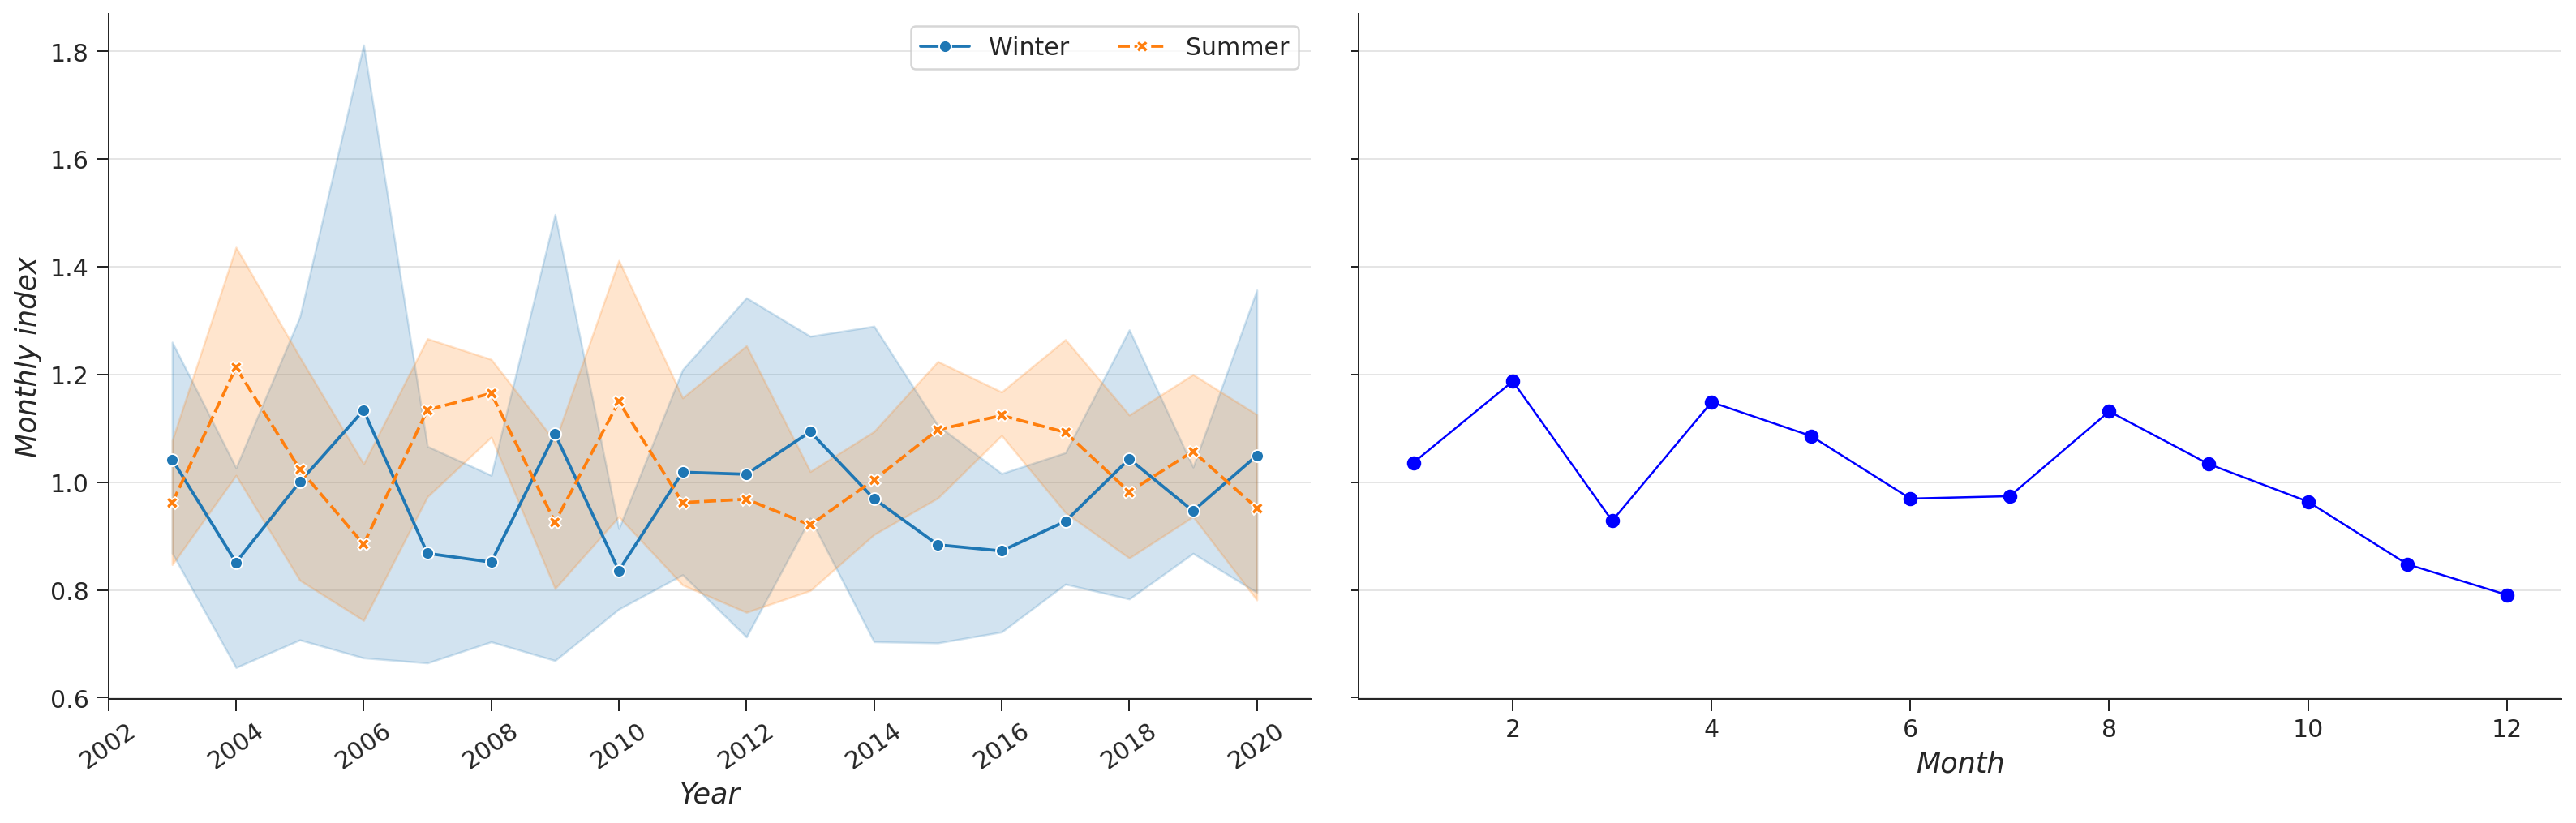

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6), dpi = 180, sharey='row')
sns.lineplot(data = mi_fin,
             x = 'Year',
             y = 'm_i',
             hue = 'season',
             style = 'season',
             markers = True,
             ax=ax1)
sns.despine(ax=ax1, top=True, right=True)
ax1.set_xticks(np.arange(2002, 2022, 2))
ax1.tick_params(axis = 'x', 
                direction='out',
                labelsize = 12,
                length = 6,
                rotation = 35)
ax1.tick_params(axis = 'y', 
                direction='out',
                labelsize = 12,
                length = 6)
ax1.set_ylabel('Monthly index',
               fontsize = 14,
               fontstyle='oblique',
               fontweight = 'medium')
ax1.set_xlabel('Year',
               fontsize = 14,
               fontstyle='oblique',
               fontweight = 'medium')
ax1.legend(labels=["Winter","Summer"], fontsize = 'large', loc = 1, ncol = 2)
ax1.grid(axis='y', alpha = 0.5)

x = monthly_ind['Month']
y = monthly_ind['Mean']
ax2.plot(x, y, 
         color='blue',
         marker='o',
         linestyle='solid',
         linewidth=1,
         markersize = 6)
ax2.tick_params(axis = 'x', 
                direction='out',
                labelsize = 12,
                length = 6)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlabel('Month',
               fontsize = 14,
               fontstyle='oblique',
               fontweight = 'medium')
ax2.grid(axis='y',alpha=0.5)
fig.tight_layout(pad=2.0)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data for JER/fig3.png') 


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
def t_test(dat1, dat2):
  stat, p = ttest_ind(dat1, dat2)
  alpha1 = 0.05
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  if p > alpha1:
      print('Same distributions (fail to reject H0)')
  else:
      print('Different distributions (reject H0)')
  return stat, p


data1 = mi_win.m_i
data2 = mi_sum.m_i
t_test(data1, data2)

  

Statistics=-1.565, p=0.119
Same distributions (fail to reject H0)


(-1.5650730723541513, 0.11904329860750582)